In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize as opt
import scipy.interpolate as interp

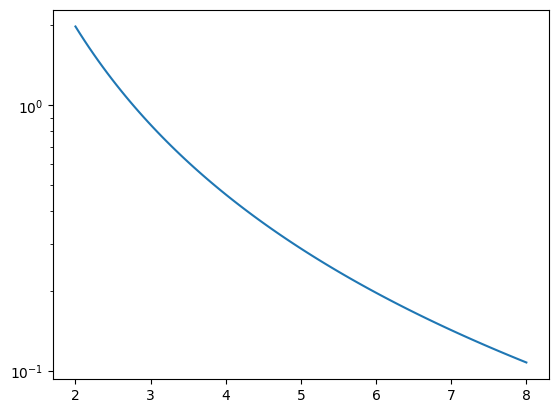

In [2]:
E = np.linspace(2,8,100)
y = 8.5*E**(-2.1)


plt.plot(E,y)
plt.yscale('log')
#pow = lambda E, t=None: norm(t) * numpy.power(E, -index(t))

Spectrum taken from:"https://iopscience.iop.org/article/10.1088/0004-637X/808/1/9/pdf"
Figure1 , Right Pannel

Multiply spectrum by E^2 to correct spectrum to match Crab Spectrum. Riemann sum the values to approximate the integral values.


In [3]:
dataspace = np.arange(2,100,1)
plt.plot(df['E'],df['Count'])
plt.plot(dataspace,powlaw(dataspace,fit[0],fit[1]))
plt.errorbar(df['E'],df['Count'], xerr = df['delE']/2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,115)
plt.ylim(1e-4,1)





NameError: name 'df' is not defined

In [ ]:
print(0.288/0.0626)

In [22]:
df1 = pd.read_csv('/mnt/c/Users/jacob/Downloads/CygX3PA.csv',header=None,names=['Phase','PA'])
df2 = pd.read_csv('/mnt/c/Users/jacob/Downloads/CygX3PD.csv',header=None,names=['Phase','PD'])
df2['Phase'] = df1['Phase']


df = pd.merge(df1,df2)
df['PA'] = df['PA']
df['Q'] = df['PD']*(np.cos(2*df['PA']*np.pi/180))
df['U'] = df['PD']*(np.sin(2*df['PA']*np.pi/180))
df['PA_'] = 0.5*np.degrees(np.arctan2(df['U'],df['Q']))
df['PD_'] = np.sqrt(((df['U'])**2) + ((df['Q'])**2))#/0.3
display(df)

phasebins = [0,0.25,0.5,0.75,1]
U_ = []
Q_ =[]
PA = []
PD = []
for i in range(len(phasebins)-1):
    I = len(df.loc[df['Phase'].between(phasebins[i],phasebins[i+1])])
    U = df['U'].loc[df['Phase'].between(phasebins[i],phasebins[i+1])].sum()/I#/len(df.loc[df['Phase'].between(phasebins[i],phasebins[i+1])])
    Q = df['Q'].loc[df['Phase'].between(phasebins[i],phasebins[i+1])].sum()/I#/len(df.loc[df['Phase'].between(phasebins[i],phasebins[i+1])])
    
    PA_ = np.degrees((0.5)*np.arctan2(U,Q))
    if PA_ < 0:
        PA_ = PA_ +180
    PA = np.append(PA,PA_)
    #0.275 is average response from CgyX
    PD_ =  (np.sqrt((U**2)+(Q**2)))#*0.3)#*100
    PD = np.append(PD, PD_)
    U_ = np.append(U_, U)
    Q_ = np.append(Q_, Q)
print(PA,PD)

,Phase,PA,PD,Q,U,PA_,PD_
0,0.042105,96.212121,25.151515,-24.562500,-5.411312,-83.787879,25.151515
1,0.142105,91.969697,23.333333,-23.278203,-1.603029,-88.030303,23.333333
2,0.242105,92.979798,23.030303,-22.905833,-2.391170,-87.020202,23.030303
3,0.342105,85.505051,19.318182,-19.080875,3.018666,85.505051,19.318182
4,0.447368,86.717172,21.590909,-21.449305,2.468741,86.717172,21.590909
5,0.542105,88.939394,21.515152,-21.500408,0.796355,88.939394,21.515152
6,0.647368,90.757576,24.469697,-24.461142,-0.647011,-89.242424,24.469697
7,0.747368,92.979798,24.772727,-24.638840,-2.572081,-87.020202,24.772727
8,0.847368,92.777778,25.000000,-24.882570,-2.420272,-87.222222,25.000000
9,0.952632,94.191919,26.363636,-26.081901,-3.843923,-85.808081,26.363636


[93.78643531 86.14478615 90.98270087 93.50362408] [23.78967091 20.44998248 23.54731565 25.67400176]


,Q,U,E,resp,PA_,PD_
2.5,0.004833,0.037545,2.5,0.23,41.332681,0.164586
3.5,0.002602,-0.014982,3.5,0.35,-40.073270,0.043446
4.5,-0.000743,-0.027437,4.5,0.40,-45.776122,0.068617
5.5,-0.011338,-0.055596,5.5,0.44,-50.763469,0.128955
6.5,-0.003532,-0.041516,6.5,0.48,-47.431093,0.086805
7.5,-0.026952,-0.094043,7.5,0.51,-52.995830,0.191822


,Q,U,E,resp,PA_,PD_
2.5,0.004833,0.037545,2.5,0.23,41.332681,0.164586
3.5,0.002602,-0.014982,3.5,0.35,-40.073270,0.043446
4.5,-0.000743,-0.027437,4.5,0.40,-45.776122,0.068617
5.5,-0.011338,-0.055596,5.5,0.44,-50.763469,0.128955
6.5,-0.003532,-0.041516,6.5,0.48,-47.431093,0.086805
7.5,-0.026952,-0.094043,7.5,0.51,-52.995830,0.191822


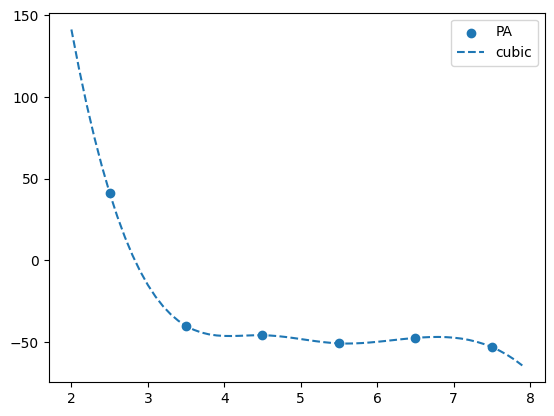

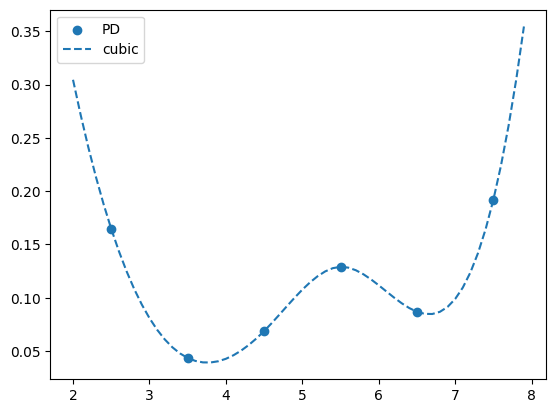

-32.61785054291445
-50.08003052314918 0.03319196977456055


In [4]:
df3 = pd.read_csv('/mnt/c/Users/jacob/Downloads/VelaX-1Polarization.csv',header=None,names=['Q','U'])

df3 = df3/100
df3['E'] = [2.5,3.5,4.5,5.5,6.5,7.5]
df3['resp'] = [0.23,0.35,0.40,0.44,0.48,0.51]
df3['PA_'] = 0.5*np.degrees(np.arctan2(df3['U'],df3['Q']))
df3['PD_'] = np.sqrt(((df3['U'])**2) + ((df3['Q'])**2))/df3['resp']
display(df3)


display(df3)

E = np.arange(2,8,0.1)
PA_func = interp.splrep(df3['E'],df3['PA_'],s=0,k=3)
PA_cubic = interp.splev(E,PA_func,der=0)
#PA_cubic_spline = InterpolatedUnivariateSpline(df3['E'],df3['PD_'])
PD_func = interp.splrep(df3['E'],df3['PD_'],s=0,k=3)
PD_cubic = interp.splev(E,PD_func,der=0)
#PA_cubic = lambda E: PA_cubic_spline(E)


plt.figure()
plt.scatter(df3['E'],df3['PA_'],label='PA')
plt.plot(E, PA_cubic, '--', label='cubic')
plt.legend()
plt.show()
plt.figure()
plt.scatter(df3['E'],df3['PD_'],label='PD')
plt.plot(E, PD_cubic, '--', label='cubic')
plt.legend()
plt.show()
print(df3['PA_'].mean())

U = df3['U'].loc[df3['E'].between(2,8)].sum()/len(df3.loc[df3['E'].between(2,8)])
Q = df3['Q'].loc[df3['E'].between(2,8)].sum()/len(df3.loc[df3['E'].between(2,8)])

PD = np.sqrt(((U)**2) + ((Q)**2))
PA =  0.5*np.degrees(np.arctan2(U,Q))

print(PA,PD)
#pa = interp.spltopp(PA_func[0][1:-1],PA_func[1],PA_func[2])
#print(pa.coeffs)

df3.to_csv('/home/jacob/data/simulation/VelaPolarization.txt',columns = ['E','PA_','PD_'], sep=' ',index = None, mode = 'w')